### Logistic Regression

In [22]:
#import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.optimize as opt

In [23]:
data = pd.read_csv('ex2data1.txt', header = None)
# Slice First two columns into X
X = data.iloc[:,0:2]
# Slice last column into y
y = data.iloc[:,2]
#head() prints initial 10 values
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


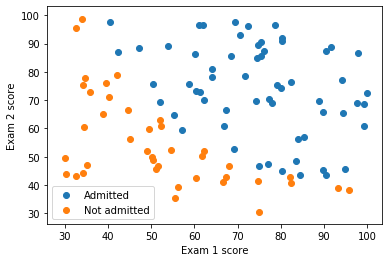

In [24]:
#Find the indicies of positive and negative examples
positive = y == 1
negative = y == 0

# Alternative Method to find positive and negative examples
# pos = where(y == 1)
# neg = where(y == 0)

# get admitted mark from column 0 and column 1 in X data 
admitted = plt.scatter(X[positive][0].values, X[positive][1].values)

# get not admitted mark from column 0 and column 1 in X data
not_admitted = plt.scatter(X[negative][0].values, X[negative][1].values)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend((admitted, not_admitted), ('Admitted', 'Not admitted'))
plt.show()

#### Sigmoid Function

Before Calculate Cost Function, recall the logistic regression hypothesis is defined as, h0(x) = g(0T*x)

where g is sigmoid function. It is defined as,

g = 1./(1+exp(-z));

In [25]:
# vectorized Sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

#### CostFunction Octave Code

Prediction = sigmoid(X*theta);

J = (1 / m) * sum( -y'*log(Prediction) - (1-y)'*log( 1 - Prediction) );

grad = (1/m) * (sum((X .* (Prediction - y)))');

#### The @ (at) operator is intended to be used for matrix multiplication.
https://docs.python.org/3.5/reference/simple_stmts.html#augmented-assignment-statements


In [26]:

def costFunction(X, y, theta):
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

In [27]:
def compute_gradient(X, y, theta,alpha,iterations):
    m = len(y)
    J_History = []
    
    for _ in range(iterations):
        cost, grad = costFunction(X,y,theta)
        theta = theta - (alpha*grad)
        J_History.append(cost)
        
    return theta,J_History

In [28]:
def featureNormalization(X):
    """
    The standard deviation is a way of measuring how much variation there
    is in the range of values of a particular feature.
    
    The mean is the average of the numbers.
    """
    mean=np.mean(X,axis=0)  # Axis = 0 means vertical
    
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [29]:
m , n = X.shape[0], X.shape[1]

X, X_mean, X_std = featureNormalization(X)

X= np.append(np.ones((m,1)),X,axis=1)

y = y[:,np.newaxis]

initial_theta = np.zeros((n+1,1))

cost, grad= costFunction(X,y,initial_theta)
print("Cost of initial theta :",cost)
print("Gradient at initial theta(zeros):",grad)


Cost of initial theta : 0.693147180559946
Gradient at initial theta(zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


#### Test 1

In [30]:
theta1 , J_history1 = compute_gradient(X,y,initial_theta,0.01,400)

In [31]:
print("Theta optimized by gradient descent:",theta1)
print("The cost of the optimized theta:",J_history1[-1])

Theta optimized by gradient descent: [[0.26567183]
 [0.74789721]
 [0.66872387]]
The cost of the optimized theta: 0.4094643825544129


Text(0.5, 1.0, 'Test1:Cost Function using gradient descent')

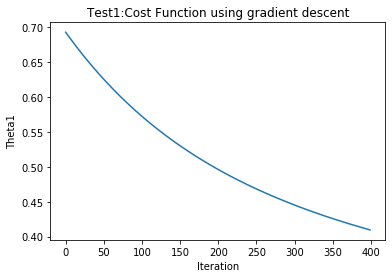

In [32]:
plt.plot(J_history1)
plt.xlabel('Iteration')
plt.ylabel('Theta1')
plt.title('Test1:Cost Function using gradient descent')

#### Test 2

In [33]:
theta2 , J_history2 = compute_gradient(X,y,initial_theta,0.1,400)

In [34]:
print("Theta optimized by gradient descent:",theta2)
print("The cost of the optimized theta:",J_history2[-1])

Theta optimized by gradient descent: [[0.91957931]
 [2.31346472]
 [2.10825197]]
The cost of the optimized theta: 0.2313531887135795


Text(0.5, 1.0, 'Test2:Cost Function using gradient descent')

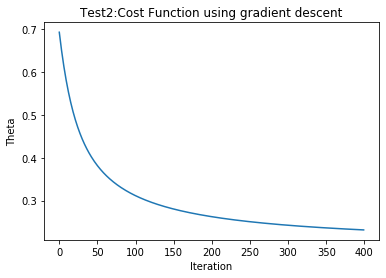

In [35]:
plt.plot(J_history2)
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.title('Test2:Cost Function using gradient descent')

#### Test 3

In [36]:
theta , J_history = compute_gradient(X,y,initial_theta,1,400)

In [37]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.2036004424822667


Text(0.5, 1.0, 'Test3:Cost Function using gradient descent')

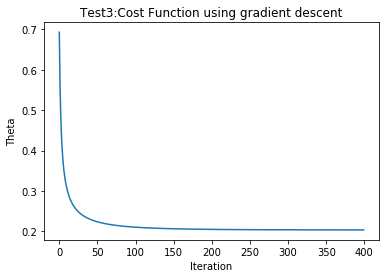

In [38]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.title('Test3:Cost Function using gradient descent')

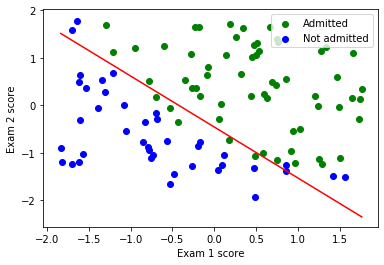

In [39]:
pos = y == 1
neg = y == 0

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="g",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",label="Not admitted")

x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]

plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=1)


#### Test using Optimised Theta 

In [47]:
#Take some random values
x_test = np.array([45,85])
#Normalization
x_test = (x_test-X_mean)/X_std
#Add Interceptor in to test set
x_test = np.append(np.ones(1),x_test)
#find probability of admission 
prob = sigmoid(x_test @ theta)

print("For student with scores of 45 & 85, We predict an admission probability of",prob[0])

For student with scores of 45 & 85, We predict an admission probability of 0.7677628875792489


#### Find Accuracy of classifier

To find Accuracy, Compute the % of correct classification on our training set. 